

# Project: Investigate Movies DataSet

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

>This project is analyzing tmdb-movies data set which is a data set contains information about movies in this project I cleaned the data set and posed important questions like
<ul>
<li><a href="#Q1">How many movies in each genre in 2015</a></li>
<li><a href="#Q2">How many movies in each genre in 2005-2015</a></li>
<li><a href="#Q3">What is Average budget for each genre</a></li>
<li><a href="#Q4">what is Average profit for each genre</a></li>
<li><a href="#Q5"> what is the Average vote count for each genre</a></li>
<li><a href="#Q6">What Average Rating for each genre</a></li>
<li><a href='#note'>Important Note</a></li>
<li><a href="#Q7">How the budget and revenue and profit affect each other</a></li>
</ul>

# Limitations
>important things to know before proceeding to this analysis is the limitation of the data as following:

>Sample size:This data set is based  10866 films which is a small sample relative to the filming industry and the analysis is based on 12662 films

>Data Quality: There are unrealistic values in budget and revenue column for several movies. This could lead to biased estimates of the impact of production costs on revenue.

>Temporal Limitations: The dataset only includes movies released in 1960-2015 which is a wide range and analysis is based on the last 10 years of that time range but Trends in the film industry may have changed since then, affecting the relevance of the findings.





In [58]:
#importing the libraries:numpy,pandas,matplotlib,seaborn
#pandas:used for data manipulation and analysis
import pandas as pd
#numpy:used for numerical calculations
import numpy as np
#matplotlib:used for data visualization
import matplotlib.pyplot as plt
#seaborn:used for data visualization
import seaborn as sns
#%matplotlib inline:used to display the plots in the jupyter notebook
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [59]:
#laoding the dataset and displaying the first 5 rows
df=pd.read_csv('tmdb-movies.csv')
df.head(5)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


columns like: imdb_id,overview,tagline are not necessary and not useful in the analysis so I'm going t drop them

In [60]:
#displaying information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

>**Too much NaN values** :there is much NaN values in columns like:production companies,director,cast,genres,homepage and so on some of them I am going to drop them and some am going to fill them, now I will check the statical information



In [61]:
#showing the statical information about the dataset
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


>**zero values in the dataset**:There are zero values in the budget,revenue,runtime and budget_adj columns which are not possible in real world scenario,Now let's clean data

>**Creating functions**:I will create functions to reduce repetitive code

In [62]:
#creating a function that makes the bar plot for the count of the values in a column
def counting_bar_plot(df,column,title,xlabel,ylabel,color):
    """"
    This function is used to create a bar plot for the count of the values in a column
    
    
    parameters:
    
    
    
    df: the data frame
    
    
    column: the column that will be plotted
    
    
    title: the title of the plot
    
    
    xlabel: the label of the x axis
    
    
    ylabel: the label of the y axis
    
    
    color: the color of the plot
    """
    df[column].value_counts().plot(kind='bar',figsize=(10,5),color=color)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    plt.show()

In [63]:
#creating a function that makes the bar plot for the mean of the values in a column
def mean_bar_plot (df,column,column2,title,xlabel,ylabel,color):
    """
    This function is used to create a bar plot for the mean of the values in a column
    
    
    parameters:
    
    
    
    df: the data frame

    column: the column that will be plotted on the x axis 
    
    
    column2: the column that will be plotted on the y axis
    
    
    title: the title of the plot
    
    
    xlabel: the label of the x axis
    
    
    ylabel: the label of the y axis
    
    
    color: the color of the plot"""
    df.groupby(column)[column2].mean().plot(kind='bar',figsize=(10,5),color=color)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    plt.show()

In [64]:
#creating a function that makes scatter plot
def scatter_plot(df,column,column2,title,xlabel,ylabel,color,alpha=None):
    """
    This function is used to create a scatter plot
    
    
    parameters:
    
    
    
    df: the data frame

    column: the column that will be plotted on the x axis 
    
    
    column2: the column that will be plotted on the y axis
    
    
    title: the title of the plot
    
    
    xlabel: the label of the x axis
    
    
    ylabel: the label of the y axis
    
    
    color: the color of the plot"""
    sns.scatterplot(data=df,x=column,y=column2,color=color,alpha=alpha)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    plt.show()    

### Data cleaning: Dealing with the problems mentioned above

In [65]:
#creating a function that will clean the data
def clean(df):
    #delete the columns that are not needed
    df.drop(columns=['homepage'],axis=1,inplace=True)
    df.drop(columns=['overview'],axis=1,inplace=True)
    df.drop(columns=['tagline'],axis=1,inplace=True)
    # Dealing with the missing values
    df.dropna(subset=['imdb_id', 'genres', 'cast',], inplace=True)
    df['production_companies'] = df['production_companies'].fillna('unknown production company')
    df['director'] = df['director'].fillna('unknown director')
    df['keywords'] = df['keywords'].fillna('no keywords')
    #dealing with the zero values
    df['budget']=df['budget'].replace(0, df['budget'].mean())
    df['revenue']=df['revenue'].replace(0, df['revenue'].mean())
    df['budget_adj']=df['budget_adj'].replace(0, df['budget_adj'].mean())
    df['revenue_adj']=df['revenue_adj'].replace(0, df['revenue_adj'].mean())
    df['runtime']=df['runtime'].replace(0, df['runtime'].mean())
    #splitting the genres column
    df['genres'] = df['genres'].str.split('|').apply(tuple).to_list()
    df.drop_duplicates(inplace=True)
    
    return df

In [66]:
clean(df)

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,1.500000e+08,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124.0,"(Action, Adventure, Science Fiction, Thriller)",Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,1.500000e+08,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120.0,"(Action, Adventure, Science Fiction, Thriller)",Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,1.100000e+08,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119.0,"(Adventure, Science Fiction, Thriller)",Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,2.000000e+08,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,136.0,"(Action, Adventure, Science Fiction, Fantasy)",Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,1.900000e+08,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,car race|speed|revenge|suspense|car,137.0,"(Action, Crime, Thriller)",Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,21,tt0060371,0.080598,1.476771e+07,4.021233e+07,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,Bruce Brown,surfer|surfboard|surfing,95.0,"(Documentary,)",Bruce Brown Films,6/15/66,11,7.4,1966,1.772136e+07,5.186719e+07
10862,20379,tt0060472,0.065543,1.476771e+07,4.021233e+07,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,John Frankenheimer,car race|racing|formula 1,176.0,"(Action, Adventure, Drama)",Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,1.772136e+07,5.186719e+07
10863,39768,tt0060161,0.065141,1.476771e+07,4.021233e+07,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,Eldar Ryazanov,car|trolley|stealing car,94.0,"(Mystery, Comedy)",Mosfilm,1/1/66,11,6.5,1966,1.772136e+07,5.186719e+07
10864,21449,tt0061177,0.064317,1.476771e+07,4.021233e+07,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,Woody Allen,spoof,80.0,"(Action, Comedy)",Benedict Pictures Corp.,11/2/66,22,5.4,1966,1.772136e+07,5.186719e+07


In [67]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10759.000000,10759.000000,1.075900e+04,1.075900e+04,10759.000000,10759.000000,10759.000000,10759.000000,1.075900e+04,1.075900e+04
mean,65417.333024,0.651244,2.245692e+07,6.232360e+07,102.723684,219.286551,5.966633,2001.276792,2.694903e+07,8.038706e+07
std,91648.109520,1.003851,2.811266e+07,1.114997e+08,30.396448,578.153569,0.930987,12.818131,3.060878e+07,1.371414e+08
min,5.000000,0.000065,1.000000e+00,2.000000e+00,3.000000,10.000000,1.500000,1960.000000,9.210911e-01,2.370705e+00
25%,10556.000000,0.210180,1.476771e+07,4.021233e+07,90.000000,17.000000,5.400000,1995.000000,1.772136e+07,5.186719e+07
50%,20414.000000,0.386180,1.476771e+07,4.021233e+07,99.000000,39.000000,6.000000,2006.000000,1.772136e+07,5.186719e+07
75%,74468.000000,0.719454,1.600000e+07,4.021233e+07,112.000000,148.000000,6.600000,2011.000000,2.103337e+07,5.186719e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


<a id='eda'></a>
## Exploratory Data Analysis


### Creating a new column
I will  create columns for profit to help in my analysis

In [68]:
#adding  new columns that will show the profit
df['profit_adj']=df['revenue_adj']-df['budget_adj']
df.insert(5,'profit',df['revenue']-df['budget']) 

<a id='Q1'></a>
### How many movies in each genre 2015

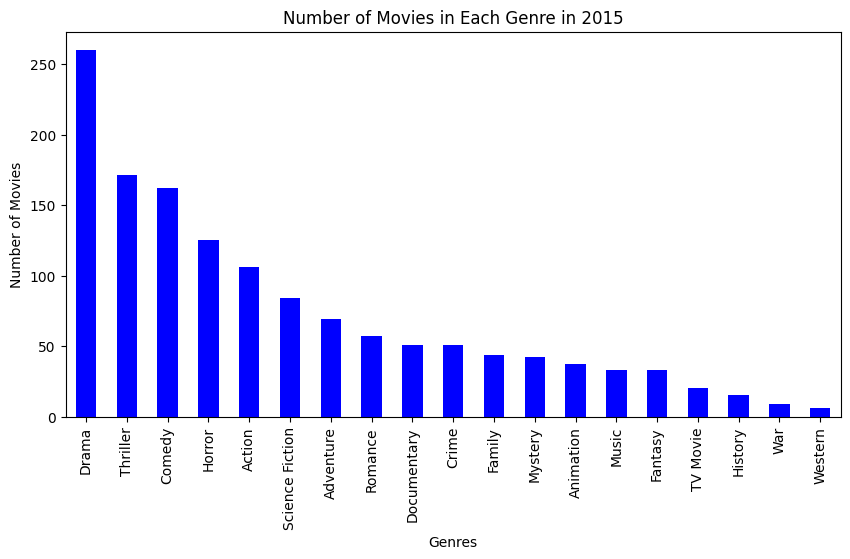

In [69]:
#creating a data frame for 2015 films
df_2015 = df[df['release_year'] == 2015]
#splitting the genres column
df_2015 = df_2015.explode('genres')
#plotting the number of movies in each genre in 2015
counting_bar_plot(df_2015,'genres','Number of Movies in Each Genre in 2015','Genres','Number of Movies','blue')

so we conclude that the most common genre in 2015 is Drama with more than 250 films


<a id='Q2'></a>
### How many movies in each genre in 2005-2015


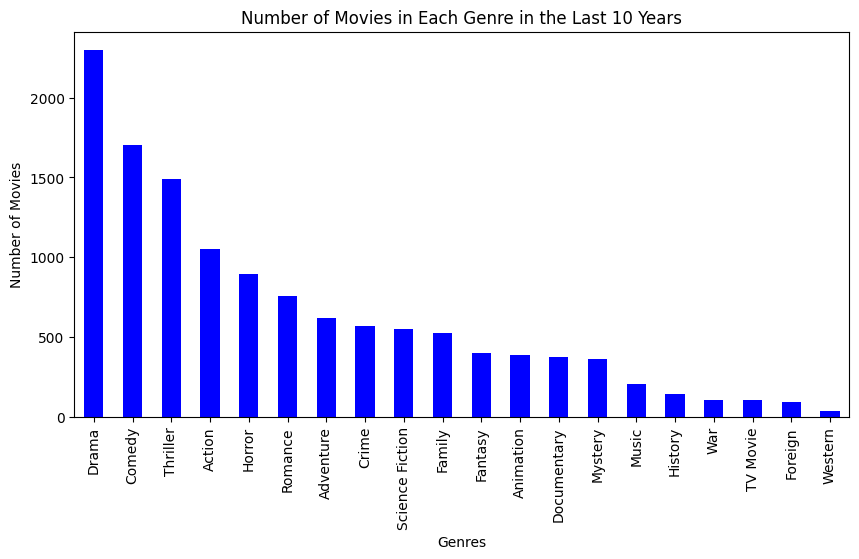

In [70]:
#creating a data frame for the last 10 years
last_10_years = df[df['release_year'] >= 2006]
last_10_years = last_10_years.explode('genres')
counting_bar_plot(last_10_years,'genres','Number of Movies in Each Genre in the Last 10 Years','Genres','Number of Movies','blue')

Now we found that Drama is the Most common genre in the last 10 years with more than 2000 films

<a id='Q3'></a>
### What is Average budget for each genre💸💸💸
the code in the next cell will show the average budget for each genre    

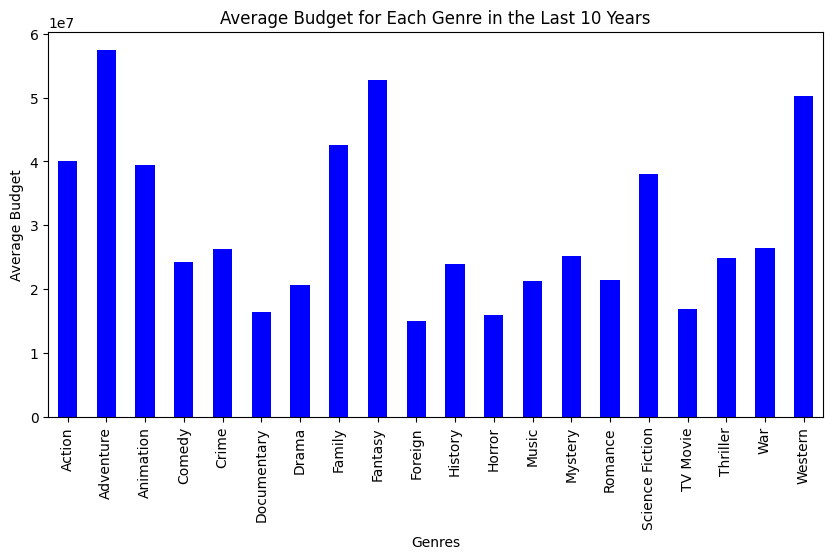

In [71]:
#making a plot that shows the average profit for each genre in 2015
mean_bar_plot(last_10_years,'genres','budget_adj','Average Budget for Each Genre in the Last 10 Years','Genres','Average Budget','blue')

I found  Adventure is the highest genre consuming budget and the lest genre consuming budget is TV Movie in The last 10 years

<a id='Q4'></a>
### What is Average profit for each genre💰💰
So lets check what is the most and The least genre making profit in The last 10 years

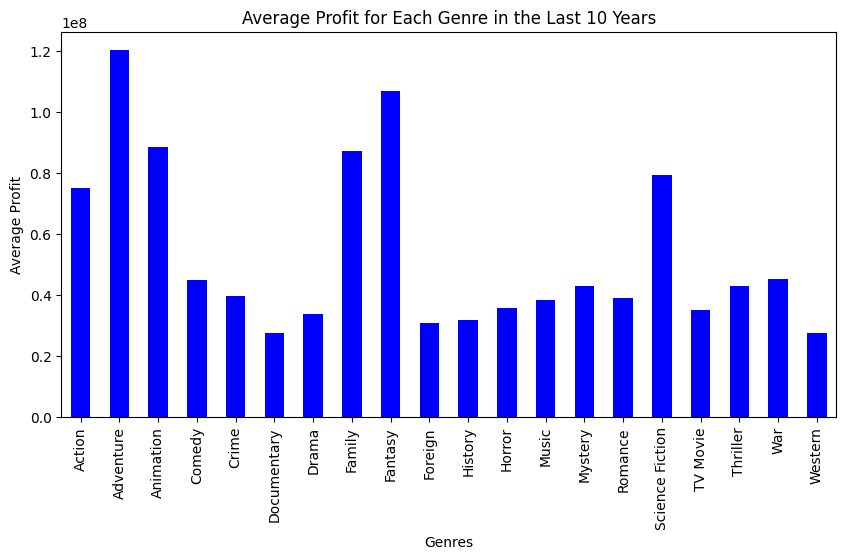

In [72]:
#making a plot for the average profit for each genre in the last 10 years
mean_bar_plot(last_10_years,'genres','profit_adj','Average Profit for Each Genre in the Last 10 Years','Genres','Average Profit','blue')

### That was AMAZING💥💥💥
Adventure films are the most consuming for budget but also the most making profit on average and as the documentary films are low consuming budget they are the least making profit on average

<a id='Q5'></a>
### what is the Average vote count for each genre

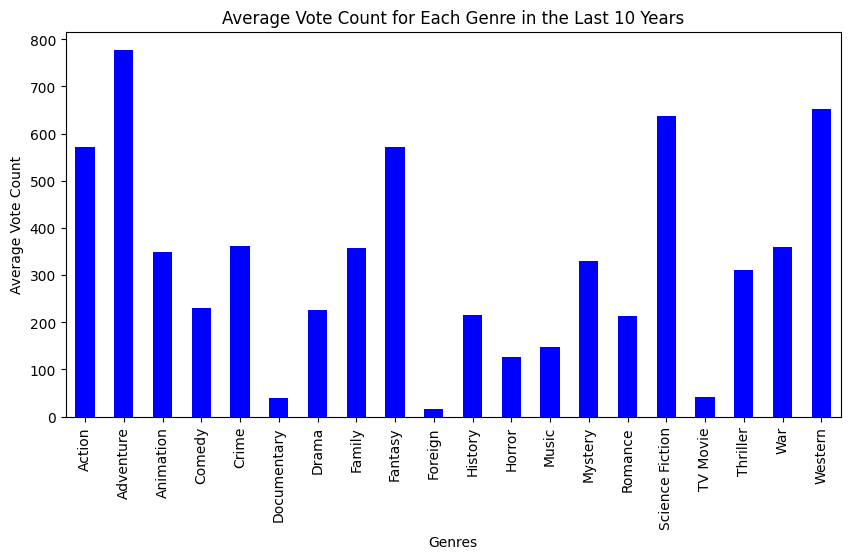

In [73]:
#making a plot that shows the average revenue_adj for each genre
mean_bar_plot(last_10_years,'genres','vote_count','Average Vote Count for Each Genre in the Last 10 Years','Genres','Average Vote Count','blue')


<a id='Q6'></a>
### What Average Rating for each genre
rating is very important indicator of the success of each genre

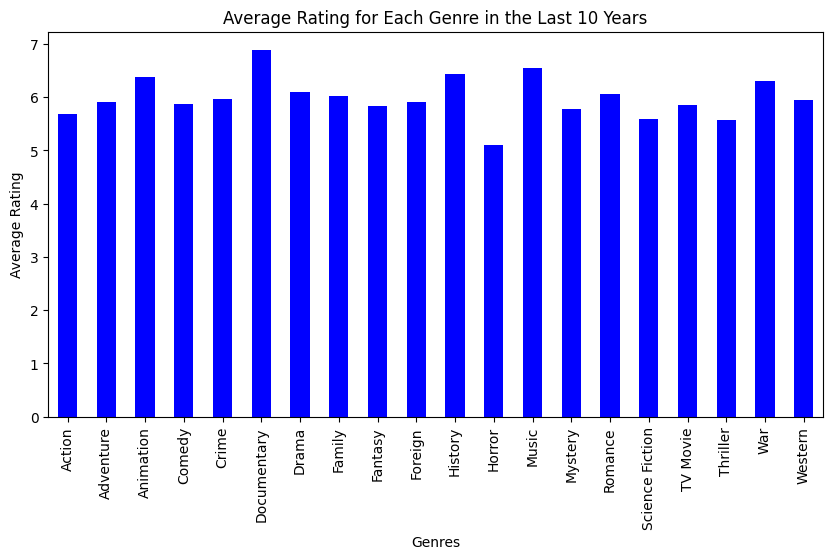

In [74]:
#creating a plot that shows the average rating for each genre in the last 10 years
mean_bar_plot(last_10_years,'genres','vote_average','Average Rating for Each Genre in the Last 10 Years','Genres','Average Rating','blue')

<a id='note'></a>
### Hmmmm🤔🤔
Adventure films are highly rated and the most making profit on average but the most consuming budget which make it The best choice for companies with large capital to finance the budget
and the documentary films as they need low budget on average and make relatively good profit and seems to be highly rated  this which makes seem it successful but this isn't true because it's vote count is low which makes it's rating not a realistic indicator the same for:Animation,History,Horror,Tv Movie

<a id='Q7'></a>
### How the budget and revenue and profit affect each other 
in a form of a heatmap,the dark red presents strong correlation and the dark blue presents weak correlation

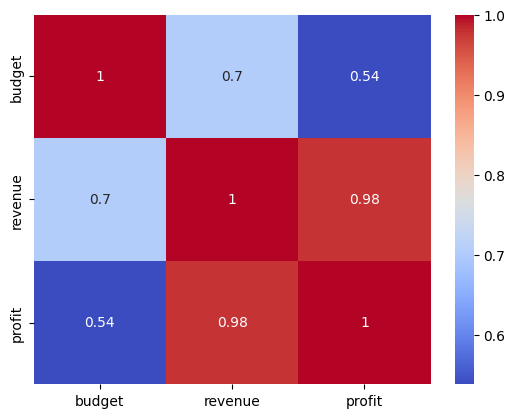

In [75]:
#create a correlation matrix
corr_matrix = df[['budget', 'revenue', 'profit']].corr()
#plotting the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
#showing the plot
plt.show()

### let's break down 
every variable have a perfect correlation with itself and this normal and not important,budget and revenue have strong correlation 0.7 which means by increasing budget revenue will probably increase but it'snot a rule some films with high budget made low revenue and the correlation between budget and profit is 0.57 which is a positive correlation but weaker than the correlation between budget and revenue which means some films with high budget made low profit

<a id='conclusions'></a>
## Conclusions

> **Summary**:1-The most common genre in 2015 ws Drama


>2-The most common genre in 2005-2015 was Drame



>3-The Average budget for each genre is shown in the plot above in millions with the highest Adventure about 6 millions



>4-The Average profit for each genre is shown in the plot above in hundred millions with the highest Adventure


>5-The Average vote count is shown in the plot above with the highest Adventure


>6-Average rating is a bit tricky indicator as it depend on vote count some genres may appear highly rated and successful but they have low vote counts



>7-there is a strong positive correlation between revenue and profit by 0.98 ,There is positive correlation between budget and revenue 0.7 and positive correlation between budget and profit by 0.57 


In [76]:
#making a html file
!jupyter nbconvert --to html investigate-a-dataset-template.ipynb

[NbConvertApp] Converting notebook investigate-a-dataset-template.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 7 image(s).
[NbConvertApp] Writing 621956 bytes to investigate-a-dataset-template.html


In [ ]:
git config --global core.editor "code --wait"

: 